# CATE & Double Machine Learning

Prof. Daniel de Abreu Pereira Uhr

## Conteúdo

* CATEs - Conditional Average Treatment Effects (Efeitos Heterogêneos do Tratamento)
* Efeitos Heterogêneos do Tratamento e o Arcabouço de Resultados Potenciais
* Ortogonalização
  * Aplicação do Procedimento de Ortogonalização no Python
* Ortogonalização e Machine Learning  (Orthogonal/Double Machine Learning - DML)


## Referências

**Principais:**
* UBER CausalML: https://causalml.readthedocs.io/en/latest/
* Microsoft EconML: https://econml.azurewebsites.net/
* https://github.com/DoubleML/doubleml-for-py
* https://docs.doubleml.org/stable/index.html
* https://github.com/MasaAsami/ReproducingDMLDiD/blob/main/notebook/Reproduction_of_DMLDiD_RO_for_NEW_SIMDATA.ipynb
* https://econml.azurewebsites.net/
* Schmidheiny, K., & Siegloch, S. (2023). On event studies and distributed-lags in two-way fixed effects models: Identification, equivalence, and generalization. Journal of Applied Econometrics, 1- 19. https://doi.org/10.1002/jae.2971
* Stevenson, Betsey, Wolfers, Justin, 2006. Bargaining in the shadow of the law: Divorce laws and family distress. Q. J. Econ. 121 (1), 267–288.
* Goodman-Bacon, A. (2021). Difference-in-differences with variation in treatment timing. Journal of Econometrics. https://doi.org/10.1016/j.jeconom.2021.03.014
* Callaway, B. and Sant'Anna, P. H. C. (2021). Difference-in-Differences with multiple time periods. Journal of Econometrics. https://doi.org/10.1016/j.jeconom.2020.12.001

**Complementares:**

* Borusyak, K.; Jaravel, X. and Spiess, J. (2023). Revisiting Event Study Designs: Robust and Efficient Estimation. arXiv: https://arxiv.org/pdf/2108.12419.pdf
* Clément deChaisemartin, Xavier d’Haultfoeuille. (2022) Difference-in-Differences Estimators of Intertemporal Treatment Effects. hal-03873903
* Roth et al. (2022) What’s Trending in Difference-in-Differences? A Synthesis of the Recent Econometrics Literature. https://www.jonathandroth.com/assets/files/DiD_Review_Paper.pdf

## CATEs - Conditional Average Treatment Effects (Efeitos Heterogêneos do Tratamento)

A nossa função de expectativa condicional é dada por: 

$$ E[Y|X, T]$$

Suponha que queremos realizar inferência causal, entre $T$ e $Y$, sob um contexto $X$, e otimizá-la. Ou seja, 

$$ \text{argmax}_{T} E[Y|X, T]$$

Ou seja, agora queremos mais do que apenas o efeito médio do tratamento (ATE). Sabemos que o tratamento tem impacto positivo em algumas pessoas, mas não em outras. Os recursos $X$ (covariáveis) desempenham um papel na definição de diferentes perfis de unidades (indivíduos), e cada perfil (indivíduo) **pode responder de forma diferente ao tratamento**. Sendo assim, **agora queremos personalizar o tratamento, dando-o apenas às unidades que melhor respondem a ele** (a ideia é "direcionar o tratamento"). Por exemplo, se um medicamento tem efeitos colaterais graves para crianças, podemos querer restringir sua distribuição apenas para adultos. Ou se uma campanha publicitária é eficaz apenas em países de língua inglesa, não vale a pena mostrá-la em outro lugar.

**CATE**: 

O **Conditional Average Treatment Effect** (CATE) é a média do efeito do tratamento condicional a um conjunto de características. Para o caso de tratamento binário, temos: 

$$ E[Y_{1}-Y_{0}|X]$$

ou, para o caso de tratamento contínuo:

$$ E[y´(t)|X]$$

O condicionamento em $X$ significa que agora permitimos que o efeito do tratamento seja diferente dependendo das características de cada unidade (indivíduo). Queremos tratar apenas as unidades certas (no caso binário) ou descobrir qual é a dosagem de tratamento ideal para cada unidade (no caso contínuo).

Considere o exemplo gráfico:

<div style="text-align:center;">
    <img src="images\elast-partition.png"  alt="Imagem" style="width: 400px;"/>
</div>

Desagregando os dados, podemos ver que o efeito do tratamento é diferente para diferentes os 3 grupos de pessoas. 

<div style="text-align:center;">
    <img src="images\elast-split.png"  alt="Imagem" style="width: 800px;"/>
</div>

Assim, a ideia é buscar a indetificação do efeito heterogêneo do tratamento, para que possamos personalizar o tratamento para cada unidade. Vamos tentar entender esse mesmo gráfico de outra maneira. Suponha que queremos encontrar os dias em que a $ \frac{d \text{Vendas}}{d \text{Preço}} $ é menor. Isso significa que, para esses dias, a elasticidade-preço é menor. Logo, do ponto de vista do vendedor, poderíamos aumentar o preço nesses dias sem perder muitas vendas (será que isso ocorre no mercado de aluguéis de imóveis durante às férias?).

A elasticidade (sensibilidade do indivíduo) é não observável. Podemos pensar cada unidade como tendo um valor $Y_{i}$, com uma elasticidade (sensibilidade) individual ($ \frac{d Y_{i}}{d T} $). 

<div style="text-align:center;">
    <img src="images\elasticity.png"  alt="Imagem" style="width: 400px;"/>
</div>


Para vermos as inclinações individuais, teríamos que observar cada dia sob dois preços diferentes e calcular como as vendas mudam para cada um desses preços. 

$$ \frac{dY_{i}}{dT} = \frac{Y_{i}(T_{i}) - Y_{i}(T_{i} + \epsilon)}{T_{i}-(T_{i} + \epsilon)}$$

Este é o problema fundamental da inferência causal novamente. Nunca podemos ver a mesma unidade sob diferentes condições de tratamento. Então, o que podemos fazer?


Um possível ajuste aos dados é utilizar o OLS.

$$ y_{i} = \alpha + \beta T_{i} + \gamma X_{i} + \epsilon_{i} $$

Diferenciando o tratamento,

$$ \frac{dY_{i}}{dT} = \beta$$

Nesse caso, é um modelo simples, e um valor constante de beta para todos os indivíduos. Esse é o ATE. No entento, se fizermos a seguinte mudança simples:

$$ y_{i} = \alpha + \beta T_{i} + \gamma X_{i} + \delta X_{i}T_{i} + \epsilon_{i} $$

Teremos uma sensibilidade diferente para cada indivíduo:

$$ \frac{dY_{i}}{dT} = \beta + \delta X_{i}$$

Onde $\delta$ é um coeficiente que depende das características de cada indivíduo ($X_{i}$). Em outras palavras, a previsão de sensibilidade mudará conforme $X$. Com essas previsões de sensibilidade, podemos agrupar as unidades por quanto achamos que elas responderão ao tratamento.






## Efeitos Heterogêneos do Tratamento e o Arcabouço de Resultados Potenciais

Podemos definir o efeito do tratamento individual (Individual Treatment Effect - ITE - $\beta_{i}$) como a diferença entre os resultados potenciais. 

$$ \beta_{i}^{ITE} = Y_{i}(1) - Y_{i}(0)$$

ou, no caso do tratamento contínuo, $\beta_{i}^{ITE} = dY_{i}/dt$, onde t é a variável de tratamento. 

Segundo o problema fundamental da inferência causal, nunca podemos observar o mesmo indivíduo sob diferentes condições de tratamento. 

$$
Y^{obs}_i(t)= 
\begin{cases}
Y_i(1), & \text{se } t=1\\
Y_i(0), & \text{se } t=0
\end{cases}
$$


Podemos definir o efeito médio do tratamento (Average Treatment Effect - ATE) como


$$
\beta^{ATE}= E[Y_i(1) − Y_i(0)] = E[\beta_i]
$$

e o efeito do tratamento médio condicional (Conditional Average Treatment Effect - CATE) como


$$
\beta^{CATE}(x) = E[Y_i(1) − Y_i(0)|X] = E[\beta_i|X_{i}=x]
$$

**Os ITE são inerentemente não observáveis.**

O que pode ser estimado em vez disso é o **Conditional Average Treatment Effect (CATE)** , ou seja, o efeito esperado do tratamento individual, condicional em covariáveis $​​X$.

Para recuperar o CATE, precisamo fazer 3 suposições:

* Não Confundimento / Inconfundibilidade (Unconfoundedness): 

$$ Y_{i}(0), Y_{i}(1) \perp T|X $$

* Sobreposição (Overlap): 

$$0 < p(x) < 1$$

* Consistência (Consistency): 

$$Y_{i} = Y_{i}(1)T_{i} + Y_{i}(0)(1-T_{i})$$

Onde $p(x)$ é o escore de propensão, ou seja, a probabilidade esperada de ser tratado, condicional às covariáveis ​​$X$.

Cabe destacar que os modelos lineares têm algumas desvantagens. A principal delas é a suposição de linearidade em $X$. Seria ótimo se pudéssemos substituir o modelo linear por um modelo de machine learning mais flexível. Poderíamos até mesmo conectar o tratamento como um recurso a um modelo de ML, como Decision Trees, rede neural ou Gradient Boosting. 

$$ y_{i} = M(X_{i}, T_{i}) + \epsilon_{i}$$


mas a partir daí, não está claro como podemos obter estimativas do efeito do tratamento, uma vez que este modelo produzirá previsões de $Y$, e não de $\beta$. Vamos aprender uns conceitos importantes para solucionar essa questão.





## Ortogonalização

Antes de estimar o CATE, precisamos conhecer um conceito importante: a Ortogonalização, e como ela é aplicada na econometria. A ideia de ortogonalização é baseada em um teorema elaborado por três econometristas em 1933, Ragnar Frisch, Frederick V. Waugh e Michael C. Lovell. Simplificando, afirma que você pode decompor qualquer modelo de regressão linear multivariável em três estágios ou modelos. 

Digamos que você tem uma matriz de covariáveis $X$, e voce particiona ela em duas partes, $X_{1}$ e $D$. 

* **Primeira Etapa**

Pegamos o primeiro conjunto de variáveis $X_{1}$ e fazemos uma regressão linear de $X_{1}$ em $Y$, onde $\theta_{1}$ é o vetor de parâmetros

$$ y_{i} = \theta_{0} + \theta_{1} X_{1i} + \epsilon_{i}$$

e guardamos os resíduos dessa regressão ($y^{*}$).

$$ y^{*}_{i} = y_{i} - \hat{y}_{i} = y_{i} - ( \hat{\theta}_{0} + \hat{\theta}_{1} X_{1i} )$$

* **Segunda Etapa**

Pegamos novamente o primeiro conjunto de características, mas agora executamos um modelo onde estimamos o segundo conjunto de características ($X_{2}$)

$$ D_{i} = \gamma(0) + \gamma(1) X_{1i} + e_{i}$$

Aqui, estamos usando o primeiro conjunto de recursos para prever o segundo conjunto de recursos. Por fim, consideramos também os resíduos desta segunda etapa.

$$ D_{i}^{*} = D_{i} - (\gamma(0) + \gamma(1) X_{1i})$$

* **Terceira etapa**

Por fim, pegamos os resíduos do primeiro e do segundo estágio e estimamos o seguinte modelo

$$ y_{i}^{*} = \beta_{0} + \beta_{2} D_{i}^{*} + e_{i}$$


* **Teorema Frisch – Waugh – Lovell (FWL)**

O teorema FWL afirma que a estimativa do parâmetro $\hat{\beta}_{2}$, estimado anteriormente, é equivalente ao que obtemos ao executar a regressão completa, com todas as covariáveis.

$$ y_{i} = \beta_{0} + \beta_{1} X_{1i} + \beta_{2} D_{i} + e_{i}$$


**Intuição do teorema FWL**

Sabemos que a regressão é um modelo muito especial. Cada um de seus parâmetros tem a interpretação de uma derivada parcial, quanto seria Y se X aumentasse em uma unidade, mantendo todos as outras covariáveis constantes. Sabemos também que se omitirmos variáveis ​​da regressão, teremos viés. Especificamente, viés variável omitido (ou viés de confusão). Ainda assim, Frisch-Waugh-Lovell está dizendo que posso dividir meu modelo de regressão em duas partes, nenhuma delas contendo o conjunto completo de recursos, e ainda assim obter a mesma estimativa que obteria executando a regressão inteira. 

O teorema fornece algumas dicas sobre o que a regressão linear está fazendo. Para obter o coeficiente de uma variável $X_{k}$, a regressão primeiro usa todas as outras variáveis ​​para prever $X_{k}$ e pega os resíduos. Isso “limpa” $X_{k}$ de qualquer influência dessas variáveis. Dessa forma, quando tentamos entender o impacto de $X_{k}$ sobre $Y$, estará livre de viés de variável omitida. Em segundo lugar, a regressão usa todas as outras variáveis ​​para prever $Y$ e pega os resíduos. Isso “limpa” $Y$ de qualquer influência dessas variáveis, reduzindo a variância de $Y$ para que seja mais fácil ver como $X_{k}$ afeta $Y$.

A regressão linear está estimando o impacto de $D$ sobre $y$ enquanto contabiliza $X_{1}$. Isso é importante para inferência causal. 

Assim, podemos construir um modelo que preveja um tratamento ($T$) usando as covariáveis $X$, um modelo que prevê o resultado $y$ usando as mesmas covariáveis, pega os resíduos de ambos os modelos e executa um modelo que estima como o resíduo de $T$ afeta o resíduo de $y$. Este último modelo vai me dizer como $T$ afeta $y$ enquanto controla por $X$. Ou seja, os dois primeiros modelos controlam as variáveis de confusão. Eles estão gerando dados que são praticamente aleatórios. Isso está distorcendo meus dados. É isso que usamos no modelo final para estimar a elasticidade.

### Aplicação do Procedimento de Ortogonalização no Python


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# DataFrame
df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/cattaneo2.dta")

# Criar a variável de resultado
df['Y'] = df['bweight']

# Crie a variável 'Treated' com valor inicial de 0
df['Treated'] = 0
# Recodifique 'Treated' para 1 se 'mbsmoke' for igual a 'smoker'
df.loc[df['mbsmoke'] == 'smoker', 'Treated'] = 1

df['casada'] = 0
df.loc[df['mmarried']=='married', 'casada'] = 1


Para desviar este conjunto de dados, precisaremos de dois modelos. O primeiro modelo, vamos chamá-lo $M_{t}(X)$, prevê o tratamento (Se a gestante é fumante, no nosso caso) utilizando os confundidores. É um dos estágios que vimos acima, no teorema de Frisch–Waugh–Lovell.

In [3]:
m_D = smf.ols("Treated ~ 1 + casada + mage + medu + fhisp + mhisp + foreign + alcohol + deadkids + nprenatal + mrace + frace + fage + fedu", data=df).fit()
df['m_D_star'] = df['Treated'] - m_D.predict(df)

Assim que tivermos este modelo, construiremos os resíduos

$$ \hat{D}_{i} = D_{i} - M_{t}(X_{i})$$

Você pode pensar neste resíduo como uma versão do tratamento que é imparcial ou, melhor ainda, que é impossível de prever a partir dos fatores de confusão $X$. Como os fatores de confusão já eram usados ​​para prever $t$, o resíduo é, por definição, imprevisível com com $X$. Outra maneira de dizer isso é que o viés foi explicado pelo modelo $M_{t}(X)$, produzindo $\hat{t}_{i}$ que é tão bom quanto atribuído aleatoriamente. É claro que isso só funciona se tivermos em $X$ todos os fatores de confusão que causam ambos $T$ e $Y$.

Também podemos construir resíduos para o resultado.

$$ \hat{y}_{i} = y_{i} - M_{y}(X_{i})$$


Este é outro estágio do teorema de Frisch – Waugh – Lovell. Isso não torna o conjunto menos tendencioso, mas facilita a estimativa do efeito, reduzindo a variância em $y$. Mais uma vez você pode pensar $\hat{y}_{i}$ como uma versão de $y_{i}$ imprevisível de $X$ ou que teve todas as suas variações devido a $X$ explicadas. Pense nisso. Nós já usamos $X$ para prever $y$ com $M_{y}(X_{i})$. E $\hat{y}_{i}$ é o erro dessa previsão. Então, por definição, não é possível prever isso a partir de $X$. Todas as informações em $X$ para prever $y$ já foram usadas. Se for esse o caso, a única coisa que resta para explicar $\hat{y}_{i}$ é algo que não usamos usamos para construí-lo (não incluído em $X$), que é apenas o tratamento (novamente, assumindo que não há fatores de confusão não medidos).


In [4]:
m_y = smf.ols("Y ~  1 + casada + mage + medu + fhisp + mhisp + foreign + alcohol + deadkids + nprenatal + mrace + frace + fage + fedu", data=df).fit()
df['m_y_star'] = df['Y'] - m_y.predict(df)

Considerando o OLS tradicional com covariáveis.

In [5]:
ols = smf.ols("Y ~ Treated + 1 + casada + mage + medu + fhisp + mhisp + foreign + alcohol + deadkids + nprenatal + mrace + frace + fage + fedu", data=df).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     38.49
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          5.80e-100
Time:                        17:29:43   Log-Likelihood:                -35858.
No. Observations:                4642   AIC:                         7.175e+04
Df Residuals:                    4627   BIC:                         7.184e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2851.5203     54.983     51.861      0.0

Agora vamos verificar se teorema de Frisch-Waugh-Lovell funciona mesmo.

In [6]:
FWL1 = smf.ols("m_y_star ~ m_D_star", data=df).fit()
print(FWL1.summary())

                            OLS Regression Results                            
Dep. Variable:               m_y_star   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     100.6
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.91e-23
Time:                        17:29:48   Log-Likelihood:                -35858.
No. Observations:                4642   AIC:                         7.172e+04
Df Residuals:                    4640   BIC:                         7.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.348e-11      8.041   2.92e-12      1.0

Depois de fazermos as duas transformações, a única coisa que resta para prever esses resíduos é o tratamento. 

Para resumir, ao prever o tratamento, construímos $\hat{t}$ que funciona como uma versão imparcial do tratamento; ao prever o resultado, construímos $\hat{y}$ que é uma versão do resultado que só pode ser explicada se usarmos o tratamento. Esses dados, onde substituímos por $y$ por $\hat{y}$ e $t$ por $\hat{t}$, são os dados desviados que queríamos. Podemos usá-lo para avaliar nosso modelo causal da mesma forma que fizemos anteriormente, usando dados aleatórios.

###  DML - Orthogonal/Double Machine Learning

Quando temos muitas possíveis variáveis ​​de controle, podemos querer selecionar as mais relevantes, possivelmente capturando não linearidades e interações. Algoritmos de aprendizado de máquina são perfeitos para essa tarefa. No entanto, nesses casos, estamos introduzindo um viés que é chamado de regularização ou pré-teste, ou viés de seleção de recursos ($X$). 

Ou seja, o que acontece se a dimensão de $X$ aumenta e não conhecemos a forma funcional através da qual $X$ afeta $Y$ e $D$?

Nesses casos, podemos usar **algoritmos de aprendizado de máquina** para **descobrir essas relações não lineares de alta dimensão**.

No artigo de **Chernozhukov et al (2016)**, os autores mostraram que também é possível fazer ortogonalização com modelos de aprendizado de máquina. 

$$ \hat{y}_{i} = y_{i} - M_{y}(X_{i})$$

$$ \hat{D}_{i} = D_{i} - M_{t}(X_{i})$$


***Machine Learning (ML)* e *Overfitting***

Os modelos de aprendizado de máquina (ML) podem ajustar-se perfeitamente aos dados, ou melhor, superajustá-los (*Overfitting* / "sobreajuste"). 

  * Apenas olhando para as equações anteriores, podemos saber o que acontecerá nesse caso. Se $M_{y}$ de alguma forma, os resíduos serão todos muito próximos de zero. Se isso acontecer, será difícil descobrir como $t$ afeta isso. 

  * Da mesma forma, se $M_{t}$ de alguma forma superajusta, seus resíduos também serão próximos de zero. Conseqüentemente, não haverá variação no resíduo do tratamento para ver como isso pode impactar o resultado.

  * OBS1: O que podemos fazer para evitar isso o overfitting? A solução é simples: **regularização**. A regularização é uma técnica que adiciona um termo à função de perda que penaliza os coeficientes do modelo. Isso faz com que o modelo seja menos sensível aos dados de treinamento, evitando o superajuste.
  * OBS2: Os modelos mais comuns de ML para previsão são: Random Forest, Gradient Boosting, Redes Neurais, Support Vector Machines, etc.
    * Random Forest: é um modelo de aprendizado de máquina que pode ser usado tanto para classificação quanto para regressão. Ele é um modelo de conjunto que treina várias árvores de decisão em subconjuntos aleatórios dos dados e faz a média de suas previsões.
    * Gradient Boosting: é um modelo de aprendizado de máquina que constrói um modelo aditivo de forma progressiva. Ele permite a otimização de funções de perda diferenciáveis arbitrárias.
    * Redes Neurais: são modelos de aprendizado de máquina que são inspirados na forma como o cérebro humano funciona. Eles são compostos por camadas de neurônios que processam e transmitem informações.
    * Support Vector Machines: são modelos de aprendizado de máquina que são usados para classificação e regressão. Eles são eficazes em espaços de alta dimensão e são capazes de lidar com dados não lineares.
    * Outros modelos de ML mais usados em economia são: LASSO, Ridge, Elastic Net, etc. LASSO é um método de regressão que adiciona uma penalidade L1 à função de perda. Isso faz com que alguns coeficientes sejam exatamente zero, o que é útil para seleção de recursos. Ridge é um método de regressão que adiciona uma penalidade L2 à função de perda. Isso faz com que os coeficientes sejam menores, o que é útil para reduzir a variância. Elastic Net é um método de regressão que combina as penalidades L1 e L2. Isso permite que você selecione recursos e reduza a variância ao mesmo tempo.

**Validação Cruzada (Cross-Validation)**

Para explicar esse procedimemto, precisamos fazer a divisão da amostra. Ou seja, estimamos o modelo com uma parte do conjunto de dados e fazemos previsões na outra parte. Uma maneira simples e intuitiva seria dividir a amostra de teste ao meio, fazer dois modelos de forma que cada um seja estimado em uma metade do conjunto de dados e faça previsões na outra metade.

Já uma implementação um pouco mais elegante usa a chamada **validação cruzada K-fold**. Ist



A vantagem é que podemos treinar todos os modelos em uma amostra maior que metade do conjunto de teste.

<div style="text-align:center;">
    <img src="images\kfold-cv.png"  alt="Imagem" style="width: 300px;"/>
</div>

Felizmente, esse tipo de previsão cruzada é muito fácil de implementar usando `cross_val_predicta` função do Sklearn.


Vamos utilizar o Random Forest para fazer a previsão do tratamento e do resultado.

In [7]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor

X = ['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']
D = "Treated"
y = "Y"

folds = 5

np.random.seed(123)
m_D = RandomForestRegressor(n_estimators=100)
D_res1 = df[D] - cross_val_predict(m_D, df[X], df[D], cv=folds)

m_y = RandomForestRegressor(n_estimators=100)
y_res1 = df[y] - cross_val_predict(m_y, df[X], df[y], cv=folds)

Agora que temos os resíduos, vamos armazená-los como colunas em um novo conjunto de dados.

In [8]:
DML1 = df.assign(**{
    "Y-ML_y(X)": y_res1,
    "Treated-ML_t(X)": D_res1,
})
DML1.head()

,bweight,mmarried,mhisp,fhisp,foreign,alcohol,deadkids,mage,medu,fage,...,lbweight,fbaby,prenatal1,Y,Treated,casada,m_D_star,m_y_star,Y-ML_y(X),Treated-ML_t(X)
0,3459,married,0,0,0,0,0,24,14,28,...,0,No,Yes,3459,0,1,-0.086026,47.203835,-295.130000,-0.026667
1,3260,notmarried,0,0,1,0,0,20,10,0,...,0,No,Yes,3260,0,0,-0.315814,277.930277,303.140000,-0.410000
2,3572,married,0,0,1,0,0,22,9,30,...,0,No,Yes,3572,0,1,-0.186338,196.895284,132.310000,-0.070000
3,2948,married,0,0,0,0,0,26,12,30,...,0,No,Yes,2948,0,1,-0.156887,-451.977522,-460.669000,0.000000
4,2410,married,0,0,0,0,0,20,12,21,...,1,Yes,Yes,2410,0,1,-0.121311,-1040.633348,-1350.973333,0.000000


In [9]:
FWL_DML1 = smf.ols("y_res1 ~ D_res1", data=DML1).fit()
print(FWL_DML1.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_res1   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     66.82
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           3.80e-16
Time:                        17:30:22   Log-Likelihood:                -36189.
No. Observations:                4642   AIC:                         7.238e+04
Df Residuals:                    4640   BIC:                         7.239e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1388      8.646      0.479      0.6

Vejamos outro exemplo do DML. Considerando Gradient Boosting Machines (GBM) para prever o tratamento e o resultado.

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Definir as variáveis X, D, y
X = ['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']
D = "Treated"
y = "Y"

# Definir o número de folds para a validação cruzada
folds = 5

# Garantir reprodutibilidade nos modelos de Gradient Boosting
m_D = GradientBoostingRegressor(n_estimators=100, random_state=123)
D_res2 = df[D] - cross_val_predict(m_D, df[X], df[D], cv=folds)

m_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
y_res2 = df[y] - cross_val_predict(m_y, df[X], df[y], cv=folds)


In [11]:
DML2 = df.assign(**{
    "Y-ML_y(X)": y_res2,
    "Treated-ML_t(X)": D_res2,
})
DML2.head()

,bweight,mmarried,mhisp,fhisp,foreign,alcohol,deadkids,mage,medu,fage,...,lbweight,fbaby,prenatal1,Y,Treated,casada,m_D_star,m_y_star,Y-ML_y(X),Treated-ML_t(X)
0,3459,married,0,0,0,0,0,24,14,28,...,0,No,Yes,3459,0,1,-0.086026,47.203835,44.846311,-0.065141
1,3260,notmarried,0,0,1,0,0,20,10,0,...,0,No,Yes,3260,0,0,-0.315814,277.930277,173.141492,-0.379986
2,3572,married,0,0,1,0,0,22,9,30,...,0,No,Yes,3572,0,1,-0.186338,196.895284,84.286938,-0.182789
3,2948,married,0,0,0,0,0,26,12,30,...,0,No,Yes,2948,0,1,-0.156887,-451.977522,-412.680405,-0.171932
4,2410,married,0,0,0,0,0,20,12,21,...,1,Yes,Yes,2410,0,1,-0.121311,-1040.633348,-1096.367541,-0.070470


In [12]:
FWL_DML2 = smf.ols("y_res2 ~ D_res2", data=DML2).fit()
print(FWL_DML2.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_res2   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     88.46
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           7.93e-21
Time:                        17:30:51   Log-Likelihood:                -35882.
No. Observations:                4642   AIC:                         7.177e+04
Df Residuals:                    4640   BIC:                         7.178e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7775      8.082      0.096      0.9

Vimos a mecânica do DML. Mas qual o melhor modelo de ML para prever o tratamento e o resultado? Precisamos avaliar.

precisamos calcular o erro quadrático médio (MSE) dos resíduos gerados para $D$ e $Y$ para ambos os modelos, e então comparar seus desempenhos.

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Definir as variáveis
X = ['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']
D = "Treated"
y = "Y"
folds = 5

# RandomForest - Estimando m_D e m_y
rf_model_D = RandomForestRegressor(n_estimators=100)
D_res_rf = df[D] - cross_val_predict(rf_model_D, df[X], df[D], cv=folds)

rf_model_y = RandomForestRegressor(n_estimators=100)
y_res_rf = df[y] - cross_val_predict(rf_model_y, df[X], df[y], cv=folds)

# GradientBoosting - Estimando m_D e m_y
gb_model_D = GradientBoostingRegressor(n_estimators=100)
D_res_gb = df[D] - cross_val_predict(gb_model_D, df[X], df[D], cv=folds)

gb_model_y = GradientBoostingRegressor(n_estimators=100)
y_res_gb = df[y] - cross_val_predict(gb_model_y, df[X], df[y], cv=folds)

# Calculando o MSE para cada modelo
mse_D_rf = mean_squared_error(df[D], df[D] - D_res_rf)  # Random Forest para D
mse_y_rf = mean_squared_error(df[y], df[y] - y_res_rf)  # Random Forest para y

mse_D_gb = mean_squared_error(df[D], df[D] - D_res_gb)  # Gradient Boosting para D
mse_y_gb = mean_squared_error(df[y], df[y] - y_res_gb)  # Gradient Boosting para y

# Exibir os resultados de MSE
print("MSE for D - Random Forest:", mse_D_rf)
print("MSE for y - Random Forest:", mse_y_rf)
print("MSE for D - Gradient Boosting:", mse_D_gb)
print("MSE for y - Gradient Boosting:", mse_y_gb)


MSE for D - Random Forest: 0.15049072305334754
MSE for y - Random Forest: 350812.5710231999
MSE for D - Gradient Boosting: 0.1322742607784923
MSE for y - Gradient Boosting: 309191.01191423537


Comparação para $D$ (Variável de Tratamento):

* Random Forest MSE: 0.1506
* Gradient Boosting MSE: 0.1323

Aqui, o Gradient Boosting tem um desempenho melhor na predição de $D$, pois seu MSE é menor. Isso significa que ele foi mais eficiente na captura da relação entre as variáveis explicativas $X$ e o tratamento $D$, resultando em resíduos menores.

Comparação para $Y$
* Random Forest MSE: 352060.35
* Gradient Boosting MSE: 309063.98

Novamente, o Gradient Boosting apresenta um MSE menor na predição de $y$, indicando que ele conseguiu capturar melhor a relação entre as variáveis explicativas  $X$ e o resultado $Y$, quando comparado ao Random Forest.


Agora vamos fazer de forma geral a análise para diversos modelos e verificar qual o melhor baseados no critério de erro quadrado médio. 

In [18]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

# Definir os modelos que vamos testar
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "MLP": MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000),
    "SVR": SVR()
}

# Definir as variáveis
X = ['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']
D = "Treated"
y = "Y"
folds = 5

# Dicionário para armazenar os MSE de cada modelo para D e y
mse_results = {}

# Loop para ajustar os modelos e calcular os MSE para D e y
for name, model in models.items():
    # Estimativa de D com validação cruzada
    D_res = df[D] - cross_val_predict(model, df[X], df[D], cv=folds)
    # Estimativa de y com validação cruzada
    y_res = df[y] - cross_val_predict(model, df[X], df[y], cv=folds)
    
    # Calcular MSE para D e y
    mse_D = mean_squared_error(df[D], df[D] - D_res)
    mse_y = mean_squared_error(df[y], df[y] - y_res)
    
    # Armazenar os resultados
    mse_results[name] = {"MSE for D": mse_D, "MSE for y": mse_y}

# Exibir os resultados
for model_name, mse in mse_results.items():
    print(f"Model: {model_name}")
    print(f"  MSE for D: {mse['MSE for D']}")
    print(f"  MSE for y: {mse['MSE for y']}\n")


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

Model: RandomForest
  MSE for D: 0.15114550000030305
  MSE for y: 351297.08558207133

Model: GradientBoosting
  MSE for D: 0.13228355511993442
  MSE for y: 309125.79049034865

Model: Lasso
  MSE for D: 0.14514535464451975
  MSE for y: 308621.37257196667

Model: Ridge
  MSE for D: 0.13530450869509936
  MSE for y: 308669.9810617438

Model: ElasticNet
  MSE for D: 0.14369145438382802
  MSE for y: 308710.90380429785

Model: MLP
  MSE for D: 0.14038924191018548
  MSE for y: 360738.86426083324

Model: SVR
  MSE for D: 0.1582687258940923
  MSE for y: 330887.97070007736



Para os resíduos de $D$: O Gradient Boosting é o modelo preferido, pois ele obteve o menor MSE para prever a variável de tratamento.

Para os resíduos de $y$: O Lasso foi o melhor em prever o resultado.

Vou aumentar o número fold para 8 e verificar se os resultados mudam. Esse aumento de 5 para 8 folds é importante para garantir que o modelo seja treinado em uma amostra maior, o que pode melhorar a precisão das previsões. Além de ser uma prática para verificar a robustez dos resultados.

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

# Definir os modelos que vamos testar
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "MLP": MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000),
    "SVR": SVR()
}

# Definir as variáveis
X = ['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']
D = "Treated"
y = "Y"
folds = 8

# Dicionário para armazenar os MSE de cada modelo para D e y
mse_results = {}

# Loop para ajustar os modelos e calcular os MSE para D e y
for name, model in models.items():
    # Estimativa de D com validação cruzada
    D_res = df[D] - cross_val_predict(model, df[X], df[D], cv=folds)
    # Estimativa de y com validação cruzada
    y_res = df[y] - cross_val_predict(model, df[X], df[y], cv=folds)
    
    # Calcular MSE para D e y
    mse_D = mean_squared_error(df[D], df[D] - D_res)
    mse_y = mean_squared_error(df[y], df[y] - y_res)
    
    # Armazenar os resultados
    mse_results[name] = {"MSE for D": mse_D, "MSE for y": mse_y}

# Exibir os resultados
for model_name, mse in mse_results.items():
    print(f"Model: {model_name}")
    print(f"  MSE for D: {mse['MSE for D']}")
    print(f"  MSE for y: {mse['MSE for y']}\n")

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

Model: RandomForest
  MSE for D: 0.1520980970340551
  MSE for y: 349468.8053384342

Model: GradientBoosting
  MSE for D: 0.13244114694873113
  MSE for y: 308077.9936950858

Model: Lasso
  MSE for D: 0.14517956178493543
  MSE for y: 308414.018017211

Model: Ridge
  MSE for D: 0.13535137678662412
  MSE for y: 308426.02969660814

Model: ElasticNet
  MSE for D: 0.1437445145464821
  MSE for y: 308393.73652545904

Model: MLP
  MSE for D: 0.14012366416355287
  MSE for y: 352474.1787789329

Model: SVR
  MSE for D: 0.1582865914491929
  MSE for y: 330487.8627229285



Aumentando para 8 folds, o Gradient Boosting torna-se o melhor modelo para prever tanto o tratamento quanto o resultado.

Podemos utilizar diretamente ou o pacote EconML, ou DoubleML, que é uma biblioteca Python para estimar e inferir sobre os efeitos heterogêneos do tratamento. 

Cabe destacar que o DoubleML estima:
* Partially linear regression (PLR) - DoubleMLPLR
* Partially linear IV regression models (PLIV) - DoubleMLPLIV
* Interactive regression models (IRM) - DoubleMLIRM
* Interactive IV regression models (IIVM) - DoubleIIVM

No caso do nosso exemplo, vamos utilizar o DoubleMLPLR.

In [14]:
from doubleml import DoubleMLData, DoubleMLPLR
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
from sklearn.model_selection import KFold

# Definir X, D, y 
X = ['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']  
D = "Treated"  
y = "Y" 

# Configurando o DoubleMLData
dml_data = DoubleMLData(df, y_col=y, d_cols=D, x_cols=X)

# Ajustar Gradient Boosting com random_state para garantir reprodutibilidade (learner / Aprendiz)
ml_gb = GradientBoostingRegressor(n_estimators=100, random_state=123)

# Definir a seed na validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=123)

# Configurar o estimador Double Machine Learning para Regressão Linear Parcial (PLR)
dml_plr = DoubleMLPLR(dml_data, ml_gb, ml_gb, n_folds=5).fit()

# Exibir o resultado do DML
print(dml_plr)

================== DoubleMLPLR Object ==================

------------------ Data summary      ------------------
Outcome variable: Y
Treatment variable(s): ['Treated']
Covariates: ['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']
Instrument variable(s): None
No. Observations: 4642

------------------ Score & algorithm ------------------
Score function: partialling out

------------------ Machine learner   ------------------
Learner ml_l: GradientBoostingRegressor(random_state=123)
Learner ml_m: GradientBoostingRegressor(random_state=123)
Out-of-sample Performance:
Regression:
Learner ml_l RMSE: [[554.35263889]]
Learner ml_m RMSE: [[0.3644704]]

------------------ Resampling        ------------------
No. folds: 5
No. repeated sample splits: 1

------------------ Fit summary       ------------------
               coef    std err         t         P>|t|       2.5 %      97.5 %
Treated -208.870166  22.504618 -9.2

Lembre que no *Partially linear regression model (PLR)* a interpretação causal depende da exogeneidade condicional, o que requer controlar variáveis de confusão. O DoubleML implementa a análise de sensibilidade em relação a confundidores omitidos.

Vamos adicionar parâmetros de sensibilidade (possiveis confundidores omitidos)
* cf_y: efeito que um confundidor não observado teria sobre a variável dependente
* cf_d:representa o impacto de um confundidor omitido sobre $D$.

Utilizamos valores hipotéticos, com base no que se acredita que os confundidores omitidos podem estar influenciando em termos percentuais $D$ ou $Y$.

In [15]:
dml_plr.sensitivity_analysis(cf_y=0.04, cf_d=0.03)
print(dml_plr.sensitivity_summary)

================== Sensitivity Analysis ==================

------------------ Scenario          ------------------
Significance Level: level=0.95
Sensitivity parameters: cf_y=0.04; cf_d=0.03, rho=1.0

------------------ Bounds with CI    ------------------
     CI lower  theta lower       theta  theta upper    CI upper
0 -298.937471  -261.860232 -208.870166  -155.880101 -118.848081

------------------ Robustness Values ------------------
   H_0     RV (%)    RVa (%)
0  0.0  12.936161  10.755954


* Estimativa Original: -208.978
* Robustez
  * H0: Assume que o efeito do tratamento é zero.
  * RV(%): O valor de 12.85% indica que, se os confundidores omitidos explicassem até 12.85% da variância da variável de tratamento $D$, a estimativa de $\theta$ perderia significância estatística.
  * RVa (%): O valor de 10.67% refere-se a uma versão ajustada do RV, levando em conta a variância da variável de resposta $Y$. Se confundidores omitidos explicassem até $10.67%$ da variância de $Y$, a significância também seria perdida.

Os resultados da análise de sensibilidade sugerem que sua estimativa causal de $-208.978$ é relativamente robusta. Para que a estimativa perca significância estatística, os confundidores omitidos teriam que explicar cerca de $12.85%$ da variância de $D$, o que indica uma certa robustez do efeito causal em relação à omissão de variáveis de confusão.

## Estimação do CATE com DML

Até agora, vimos como o Double/Debiased ML (Double Machine Learning - DML) nos permite focar na estimativa do Efeito Médio do Tratamento (ATE). No entanto, ele também pode ser usado para estimar a heterogeneidade dos efeitos do tratamento ou o Efeito Médio Condicional do Tratamento (CATE). 

Logo, o CATE para modelos DoubleMLPLR consideram uma versão ligeiramente ajustada do modelo DoubleMLPLR. Em vez de considerar um efeito de tratamento constante para todas as observações, o modelo ajustado permite um efeito diferente com base em grupos.

$$ Y = D \theta_{0} (X) + g_{0}(X) + \epsilon$$

com  $E(\epsilon|D,X)=0$, e

$$ D = m_{0}(X) + \eta$$

com $E(\eta|X)=0$.

onde $\theta_{0}(X)$ é o efeito heterogêneo do tratamento.

Passos para a análise. 
* Carregar o seu conjunto de dados e definir as variáveis relevantes ($X$,$D$,$Y$).
* Criar o spline basis usando uma covariável contínua, como você fez anteriormente com mage (ou outra variável relevante).
* Estimar o CATE usando o método cate() do DoubleMLPLR.
* Gerar o intervalo de confiança para o CATE com splines.
* Plotar os resultados comparando o efeito estimado com o intervalo de confiança, similar ao gráfico gerado no exemplo.

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\doubleml\plm\plr.py:121: UserWarning: A learner ml_g has been provided for score = "partialling out" but will be ignored. "A learner ml_g is not required for estimation.
  warnings.warn(('A learner ml_g has been provided for score = "partialling out" but will be ignored. "'


Training PLR Model


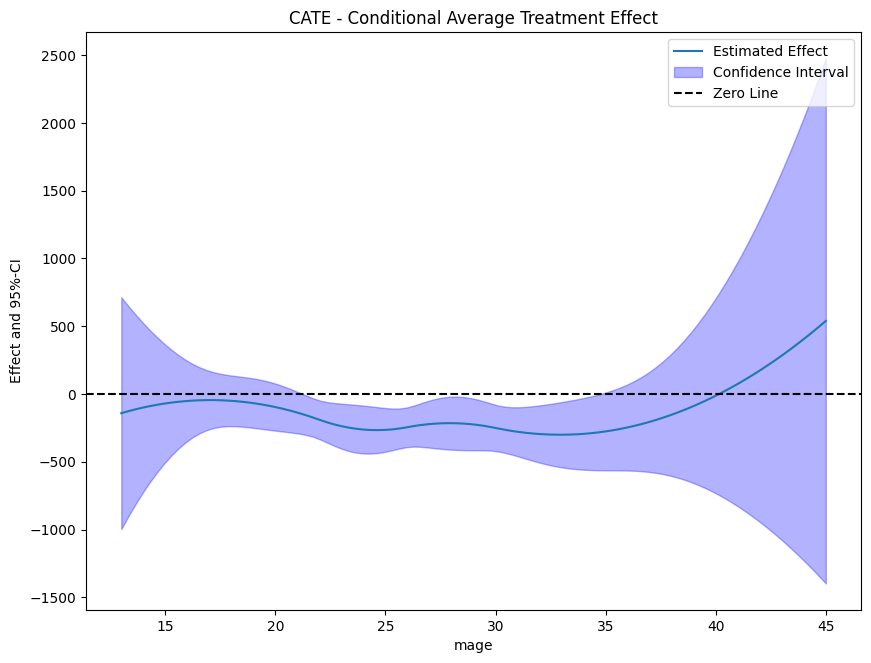

In [17]:
import numpy as np
import pandas as pd
import doubleml as dml
import patsy
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib import pyplot as plt

# Definir as variáveis X, D, y
X = ['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']
D = "Treated"
y = "Y"

# Configurar o DoubleMLData com seu conjunto de dados
data_dml_base = dml.DoubleMLData(df, y_col=y, d_cols=D, x_cols=X)

# Definir os modelos de machine learning
gradientBoosting_reg = GradientBoostingRegressor(n_estimators=500, random_state=42)

# Criar o objeto DoubleMLPLR com os três modelos de aprendizado de máquina
dml_plr = dml.DoubleMLPLR(data_dml_base, ml_g=gradientBoosting_reg, ml_m=gradientBoosting_reg, ml_l=gradientBoosting_reg)

# Ajustar o modelo DoubleMLPLR
print("Training PLR Model")
dml_plr.fit()

# Criar o spline basis para modelar o CATE (usando a variável 'mage' como exemplo)
design_matrix = patsy.dmatrix("bs(x, df=5, degree=2)", {"x": df["mage"]})
spline_basis = pd.DataFrame(design_matrix)

# Estimar o CATE usando o spline basis
cate = dml_plr.cate(spline_basis)

# Calcular os intervalos de confiança para o CATE
new_data = {"x": np.linspace(df["mage"].min(), df["mage"].max(), 100)}
spline_grid = pd.DataFrame(patsy.build_design_matrices([design_matrix.design_info], new_data)[0])
df_cate = cate.confint(spline_grid, level=0.95, joint=True, n_rep_boot=2000)

# Plotar o CATE estimado
plt.rcParams['figure.figsize'] = 10., 7.5
df_cate['x'] = new_data['x']

fig, ax = plt.subplots()
ax.plot(df_cate['x'], df_cate['effect'], label='Estimated Effect')
ax.fill_between(df_cate['x'], df_cate['2.5 %'], df_cate['97.5 %'], color='b', alpha=.3, label='Confidence Interval')

# Adicionar uma linha horizontal em zero
ax.axhline(0, color='black', linestyle='--', label='Zero Line')

plt.legend()
plt.title('CATE - Conditional Average Treatment Effect')
plt.xlabel('mage')
plt.ylabel('Effect and 95%-CI')

plt.show()


Um spline é uma função matemática utilizada para aproximar ou interpolar dados, permitindo modelar relações não lineares de forma flexível. Em essência, splines são combinações de funções polinomiais de baixo grau (como polinômios de grau 2 ou 3) que são unidas em pontos específicos chamados de nós (knots). Esses nós dividem o domínio da variável independente em diferentes intervalos, e em cada intervalo, o spline pode assumir uma forma polinomial diferente, garantindo suavidade nas junções.

No contexto da sua análise com o Double Machine Learning (DML), os splines são usados para modelar a heterogeneidade do efeito do tratamento em relação a uma covariável contínua, como a idade materna (mage). Ao utilizar splines, você permite que o efeito estimado do tratamento varie de maneira flexível ao longo dos valores de mage, capturando possíveis relações não lineares entre a idade materna e o efeito do tratamento.

Você está criando uma base spline utilizando a função bs() do pacote patsy, que gera splines básicos (basis splines). Aqui, df=5 especifica o número de graus de liberdade, o que influencia o número de nós e, consequentemente, a flexibilidade do spline. degree=2 indica que está utilizando splines quadráticos. A base spline resultante é então utilizada para estimar o CATE, permitindo que o efeito do tratamento varie de forma suave e não linear com mage.

In [21]:
import numpy as np
import pandas as pd
from econml.dml import DMLCateEstimator
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt

# Carregar o conjunto de dados
df = pd.read_csv('seu_conjunto_de_dados.csv')  # Substitua pelo seu caminho

# Definir as variáveis
X = df[['casada', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol',
        'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']]
T = df['Treated']
y = df['Y']
mage = df['mage']  # Variável de heterogeneidade

# Definir o modelo de aprendizagem
estimator = GradientBoostingRegressor(n_estimators=500, random_state=42)

# Criar o objeto DMLCateEstimator
dml_estimator = DMLCateEstimator(model_y=estimator,
                                 model_t=estimator,
                                 model_final=GradientBoostingRegressor(),
                                 discrete_treatment=True,
                                 cv=KFold(n_splits=5))

# Ajustar o modelo
dml_estimator.fit(y, T, X=X, W=mage)

# Criar um grid para 'mage'
mage_grid = np.linspace(df['mage'].min(), df['mage'].max(), 100)
cate_values = dml_estimator.effect(X=X.assign(mage=mage_grid))

# Plotar o CATE estimado
plt.figure(figsize=(10, 7))
plt.plot(mage_grid, cate_values, label='Efeito Estimado')
plt.axhline(0, color='black', linestyle='--', label='Linha Zero')
plt.legend()
plt.title('CATE - Efeito Médio Condicional do Tratamento estimado pelo EconML')
plt.xlabel('Idade Materna (mage)')
plt.ylabel('Efeito Estimado')
plt.show()


ImportError: cannot import name '_print_elapsed_time' from 'sklearn.utils' (c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\__init__.py)

In [22]:
import sklearn
import econml

print("Versão do scikit-learn:", sklearn.__version__)
print("Versão do EconML:", econml.__version__)


Versão do scikit-learn: 1.5.2
Versão do EconML: 0.15.0


#### Exemplo bidimensional

In [69]:
import numpy as np
import pandas as pd
import doubleml as dml
import patsy
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import plotly.graph_objects as go

# Definir as variáveis X, D, y
X = ['mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']
D = "Treated"
y = "Y"

# Configurar o DoubleMLData com seu conjunto de dados
data_dml_base = dml.DoubleMLData(df, y_col=y, d_cols=D, x_cols=X)

# Definir os modelos de machine learning
randomForest_reg = RandomForestRegressor(n_estimators=500, random_state=42)
randomForest_class = RandomForestClassifier(n_estimators=500, random_state=42)

# Criar o objeto DoubleMLIRM com os modelos
dml_irm = dml.DoubleMLIRM(data_dml_base,
                          ml_g=randomForest_reg,
                          ml_m=randomForest_class,
                          trimming_threshold=0.05,
                          n_folds=5)

# Ajustar o modelo IRM
print("Training IRM Model")
dml_irm.fit()

# Criar o spline basis bidimensional usando 'mage' e 'medu' (idade e educação da mãe)
design_matrix = patsy.dmatrix("te(bs(mage, df=7, degree=3), bs(medu, df=7, degree=3))", {"mage": df["mage"], "medu": df["medu"]})
spline_basis = pd.DataFrame(design_matrix)

# Estimar o CATE usando o spline basis
cate = dml_irm.cate(spline_basis)

# Calcular os intervalos de confiança para o CATE
grid_size = 100
mage_grid = np.linspace(df["mage"].min(), df["mage"].max(), grid_size)
medu_grid = np.linspace(df["medu"].min(), df["medu"].max(), grid_size)
mage_grid, medu_grid = np.meshgrid(mage_grid, medu_grid)

new_data = {"mage": mage_grid.ravel(), "medu": medu_grid.ravel()}
spline_grid = pd.DataFrame(patsy.build_design_matrices([design_matrix.design_info], new_data)[0])
df_cate = cate.confint(spline_grid, joint=True, n_rep_boot=2000)

# Plotar o CATE estimado com intervalo de confiança
effect = np.asarray(df_cate['effect']).reshape(mage_grid.shape)
lower_bound = np.asarray(df_cate['2.5 %']).reshape(mage_grid.shape)
upper_bound = np.asarray(df_cate['97.5 %']).reshape(mage_grid.shape)

# Se você tiver o verdadeiro efeito do tratamento para comparação, inclua aqui (caso contrário, vamos omitir)
# Por exemplo: true_effect = true_treatment_effect_function(mage_grid, medu_grid)

# Plotar o efeito estimado e o intervalo de confiança usando Plotly
fig = go.Figure(data=[
    go.Surface(x=mage_grid, y=medu_grid, z=effect, name="Estimated Effect"),
    go.Surface(x=mage_grid, y=medu_grid, z=upper_bound, showscale=False, opacity=0.4, colorscale='purp', name="Upper Bound"),
    go.Surface(x=mage_grid, y=medu_grid, z=lower_bound, showscale=False, opacity=0.4, colorscale='purp', name="Lower Bound"),
])

fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))

# Definir a largura e a margem no layout geral, não no objeto scene
fig.update_layout(
    scene=dict(
        xaxis_title='mage (Idade da mãe)',
        yaxis_title='medu (Educação da mãe)',
        zaxis_title='Effect',
    ),
    width=700,  # Aqui você define a largura do gráfico
    margin=dict(r=20, b=10, l=10, t=10)  # Definir a margem fora do objeto 'scene'
)

fig.show()


Training IRM Model


c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\doubleml\utils\_checks.py:204: UserWarning:

Propensity predictions from learner RandomForestClassifier(n_estimators=500, random_state=42) for ml_m are close to zero or one (eps=1e-12).



In [76]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from econml.dr import DRLearner
from matplotlib import pyplot as plt

# Definir as variáveis X, D, y
X = df[['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']]
D = df["Treated"]
y = df["Y"]

# Definir os modelos de machine learning para as predições
model_y = GradientBoostingRegressor(n_estimators=500, random_state=42)  # Modelo para Y
model_t = GradientBoostingClassifier(n_estimators=500, random_state=42)  # Modelo para o tratamento (classificação binária)

# Criar o Doubly Robust Learner (DRLearner)
dr_learner = DRLearner(model_propensity=model_t, model_regression=model_y)

# Ajustar o modelo DRLearner
dr_learner.fit(y, D, X=X)
# Estimar o CATE em relação à variável 'mage' (Idade da mãe)
cate_mage = dr_learner.effect(X=X)

# Calcular intervalos de confiança para o CATE
cate_mage_lower, cate_mage_upper = dr_learner.effect_interval(X=X)

# Plotar o CATE estimado com relação a 'mage' e os intervalos de confiança
plt.rcParams['figure.figsize'] = 10., 7.5
plt.scatter(df["mage"], cate_mage, label='Estimated CATE')
plt.fill_between(df["mage"], cate_mage_lower, cate_mage_upper, color='b', alpha=0.3, label='Confidence Interval')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Estimated CATE with EconML DRLearner')
plt.xlabel('mage (Idade da mãe)')
plt.ylabel('Estimated Effect')
plt.legend()
plt.show()


ImportError: cannot import name '_print_elapsed_time' from 'sklearn.utils' (c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\__init__.py)

In [65]:
import numpy as np
import pandas as pd
import patsy
import doubleml as dml
from sklearn.ensemble import RandomForestRegressor

# Definir as variáveis X, D, y
X = ['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']
D = "Treated"
y = "Y"

# Definir os hiperparâmetros para os modelos RandomForest
ml_g = RandomForestRegressor(n_estimators=100, max_features=10, max_depth=5, min_samples_leaf=2, random_state=123)
ml_m = RandomForestRegressor(n_estimators=100, max_features=10, max_depth=5, min_samples_leaf=2, random_state=123)

# Configurar o DoubleMLData com seu conjunto de dados (substitua 'df' pelo seu DataFrame real)
dml_data = dml.DoubleMLData(df, y_col=y, d_cols=D, x_cols=X)

# Criar o objeto DoubleMLPLR
dml_plr_obj = dml.DoubleMLPLR(dml_data, ml_g, ml_m)

# Ajustar o modelo
dml_plr_obj.fit()

# Construir o spline basis para modelar o CATE (supondo que "X1" seja uma das variáveis relevantes)
design_matrix = patsy.dmatrix("bs(x, df=5, degree=2)", {"x": dml_data.data["mage"]})  # Exemplo com a variável 'mage'
spline_basis = pd.DataFrame(design_matrix)

# Estimar o CATE usando o spline basis
cate_obj = dml_plr_obj.cate(basis=spline_basis)

# Calcular os intervalos de confiança para o CATE
ci = cate_obj.confint(basis=spline_basis)

# Exibir os intervalos de confiança para o CATE
print(ci.head())


        2.5 %      effect      97.5 %
0 -344.851304 -255.711461 -166.571618
1 -198.720963 -112.179772  -25.638581
2 -263.277774 -191.448987 -119.620199
3 -320.738190 -247.656946 -174.575701
4 -198.720963 -112.179772  -25.638581




Essencialmente, agora estamos dizendo que o parâmetro causal $\tau$ muda dependendo das covariáveis da unidade.

$$
Y_i - {M}_y(X_i) = \tau(X_i) \cdot (T_i - {M}_t(X_i)) + \epsilon_i
$$

Para estimar este modelo, usaremos a mesma versão residualizada de preço e vendas, mas agora vamos interagir os resíduos do preço com as outras covariáveis. Em seguida, podemos ajustar um modelo linear de CATE.

$$
\tilde{Y_i} = \alpha + \beta_1 \tilde{T_i} + \pmb{\beta}_2 \pmb{X_i} \tilde{T_i} + \epsilon_i
$$

Depois de estimarmos tal modelo, para fazer previsões de CATE, usaremos o conjunto de teste randomizado. Como este modelo final é linear, podemos calcular o CATE mecanicamente:

$$
\hat{\mu}(\partial PesoBebê_i, X_i) = M(Fumante=1, X_i) - M(Fumante=0, X_i)
$$

onde $M$ é nosso modelo linear final.


In [81]:
import statsmodels.formula.api as smf

# Estimar o modelo
final_model_cate = smf.ols(formula='y_res1 ~ D_res1*(mage) + casada + mage + medu + fhisp + mhisp + foreign + alcohol + deadkids + nprenatal + mrace + frace + fage + fedu', data=df).fit()
# Calcular o CATE
cate_test = df.assign(cate=final_model_cate.predict(df.assign(D_res1=1)) - final_model_cate.predict(df.assign( D_res1=0)))
cate_test

,bweight,mmarried,mhisp,fhisp,foreign,alcohol,deadkids,mage,medu,fage,...,birthmonth,lbweight,fbaby,prenatal1,Y,Treated,casada,m_D_star,m_y_star,cate
0,3459,married,0,0,0,0,0,24,14,28,...,12,0,No,Yes,3459,0,1,-0.086026,47.203835,-170.004779
1,3260,notmarried,0,0,1,0,0,20,10,0,...,7,0,No,Yes,3260,0,0,-0.315814,277.930277,-134.736065
2,3572,married,0,0,1,0,0,22,9,30,...,3,0,No,Yes,3572,0,1,-0.186338,196.895284,-152.370422
3,2948,married,0,0,0,0,0,26,12,30,...,1,0,No,Yes,2948,0,1,-0.156887,-451.977522,-187.639136
4,2410,married,0,0,0,0,0,20,12,21,...,3,1,Yes,Yes,2410,0,1,-0.121311,-1040.633348,-134.736065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,3317,notmarried,0,0,0,0,0,21,12,24,...,10,0,Yes,No,3317,1,0,0.683205,5.917001,-143.553243
4638,3030,married,0,0,0,1,1,30,12,23,...,2,0,No,No,3030,1,1,0.478816,-259.794082,-222.907850
4639,2950,notmarried,0,0,0,0,0,23,12,0,...,5,0,Yes,Yes,2950,0,0,-0.191829,-242.054511,-161.187600
4640,3969,married,0,0,0,0,0,23,12,25,...,2,0,Yes,Yes,3969,0,1,-0.142649,518.911072,-161.187600


## Procedimento de Double/Debiased ML com um Modelo Linear Final

O procedimento de Double/Debiased ML com um modelo linear final já é muito bom, como podemos ver pela curva acima. Mas, talvez possamos fazer ainda melhor. De fato, este é um procedimento muito geral que podemos entender como um meta-aprendizado (*meta-learner*). Nie e Wager o chamaram de R-Learner, como uma forma de reconhecer o trabalho de Robinson (1988) e enfatizar o papel da residualização.

Essa generalização vem do entendimento de que o procedimento de Double/Debiased ML define uma nova função de perda que podemos minimizar da forma que quisermos. A seguir, veremos como fazer isso de maneira muito semelhante ao que vimos antes ao discutir o método de transformação de alvo ou o F-learner.

## Double/Debiased ML Não Paramétrico

O interessante sobre o Double-ML é que ele nos livra de toda a complicação de aprender os parâmetros de incômodo em um modelo causal. Com isso, podemos concentrar toda a nossa atenção em aprender o parâmetro causal de interesse, seja o ATE ou o CATE. No entanto, com a especificação acima, ainda estávamos usando um modelo linear após a residualização por ML, como modelo causal final. Em nosso exemplo, isso significa que estamos assumindo que o preço impacta as vendas de forma linear. Isso provavelmente está OK para uma faixa pequena de preços, mas sabemos pela teoria microeconômica que isso não é necessariamente o caso. Pode ser que, em preços baixos, um aumento unitário no preço reduza a demanda em 2 unidades. Mas então, em preços mais altos, um aumento unitário no preço pode reduzir a demanda em apenas 1 unidade. Isso não é uma relação linear.

Poderíamos usar a teoria microeconômica aqui para especular sobre a forma funcional do desfecho em relação ao tratamento, mas talvez possamos também delegar isso a um modelo de ML. Em outras palavras, deixar a máquina aprender essa forma funcional complicada. Acontece que isso é totalmente possível se fizermos algumas mudanças em nosso algoritmo original de Double/Debiased ML.

Primeiro, começamos exatamente como antes, ortogonalizando o tratamento e o desfecho com previsões cruzadas de um modelo de ML.

Ver:

https://matteocourthoud.github.io/post/double_ml/ 

https://econml.azurewebsites.net/spec/estimation/dml.html#
https://github.com/py-why/EconML/blob/main/notebooks/CATE%20validation.ipynb


### DRML - Doubly Robust Machine Learning


### DDML - Double/Debiased Machine Learning - Chernozhukov et al. (2018)

Também conhecido como o ML duplo/desviado não paramétrico


O bom do Double/Debiased-ML (DDML) é que ele nos livra de todo o incômodo de aprender os parâmetros incômodos em um modelo causal. Com isso, podemos concentrar toda a nossa atenção em aprender o parâmetro causal de interesse, seja o ATE ou o CATE. No entanto, com a especificação acima, ainda estávamos usando um modelo linear após a residualização do ML, como o modelo causal final. Em nosso exemplo, isso significa que estamos assumindo que o preço impacta as vendas linearmente. Isso provavelmente é OK para uma pequena faixa de preços, mas sabemos pela teoria microeconômica que esse não é necessariamente o caso. Pode ser que, a preços baixos, um aumento unitário no preço reduza a demanda em 2 unidades. Mas então, a preços mais altos, um aumento unitário no preço reduza a demanda em apenas 1 unidade. Essa não é uma relação linear.


In [37]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_predict

y = "sales"
T = "price"
X = ["temp", "weekday", "cost"]

debias_m = LGBMRegressor(max_depth=3)

train_pred = train.assign(price_res =  train[T] -
                          cross_val_predict(debias_m, train[X], train[T], cv=5)
                          + train[T].mean()) # add mu_t for visualization. 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 3
[LightGBM] [Info] Start training from score 6.143650
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [38]:
y = "sales"
T = "price"
X = ["temp", "weekday", "cost"]

debias_m = LGBMRegressor(max_depth=3)
denoise_m = LGBMRegressor(max_depth=3)

train_pred = train.assign(price_res =  train[T] - cross_val_predict(debias_m, train[X], train[T], cv=5),
                          sales_res =  train[y] - cross_val_predict(denoise_m, train[X], train[y], cv=5))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 3
[LightGBM] [Info] Start training from score 6.143650
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

Isso é nada menos que incrível, porque agora podemos chamar isso de função de perda causal . O que significa que, se minimizarmos o quadrado dessa perda, estaremos estimando o valor esperado de
, que é o CATE.

In [41]:
model_final = LGBMRegressor(max_depth=3)
 
# create the weights
w = train_pred["price_res"] ** 2 
 
# create the transformed target
y_star = (train_pred["sales_res"] / train_pred["price_res"])
 
# use a weighted regression ML model to predict the target with the weights.
model_final.fit(X=train[X], y=y_star, sample_weight=w)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 3
[LightGBM] [Info] Start training from score -3.857895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMRegressor(max_depth=3)

### Deveríamos usar DD se temos DML?
https://matteocourthoud.github.io/post/did_or_dml/


Em suma:

O principal objetivo do DML é ajustar e remover a variável de confusão de forma que a variável de interesse (tratamento) e o desfecho (resultado) fiquem "ortogonais" ou "independentes".

Abordagem:

DML combina métodos de aprendizado de máquina com técnicas econométricas para estimar efeitos causais.
Utiliza a ideia de "nuisance parameters" (parâmetros de incômodo) que são ajustados e removidos do modelo principal para reduzir o viés.
A técnica geralmente envolve a aplicação de aprendizado de máquina para prever tanto o tratamento quanto o desfecho usando variáveis de confusão, e então os resíduos dessas previsões são utilizados em um segundo estágio para estimar o efeito causal.

Implementação:

Primeiro Estágio: Aplicar modelos de aprendizado de máquina para prever a variável de tratamento e o resultado.
Segundo Estágio: Utilizar os resíduos dessas previsões em um modelo de regressão para estimar o efeito causal.




### Doubly Robust Machine Learning (DRML)

Objetivo:

DRML visa fornecer estimativas consistentes do efeito causal mesmo que uma das duas especificações de modelo (do tratamento ou do desfecho) esteja incorreta.
Abordagem:

A metodologia DRML combina a ponderação de probabilidade inversa (IPW) com métodos de regressão.
Essa abordagem é "duplamente robusta" porque, para a consistência da estimativa, é necessário que apenas um dos modelos - ou o modelo de probabilidade de tratamento (propensity score) ou o modelo de desfecho (outcome model) - esteja corretamente especificado.
Implementação:

Modelagem do Propensity Score: Estimar a probabilidade de cada unidade receber o tratamento.
Modelagem do Desfecho: Estimar o desfecho esperado condicional ao tratamento e às covariáveis.
Combinação dos Modelos: Utilizar uma combinação das estimativas dos dois modelos para obter uma estimativa do efeito causal que é robusta a erros na especificação de um dos modelos.

#### Resumo Comparativo: DML vs DRML

* DML: Foca na remoção de viés através de uma abordagem em dois estágios, utilizando previsões de aprendizado de máquina e resíduos. Busca a ortogonalidade entre o tratamento e o desfecho.
* DRML: Utiliza a ponderação de probabilidade inversa e a modelagem do desfecho para obter estimativas robustas. É duplamente robusta porque requer que apenas um dos dois modelos esteja corretamente especificado.

Ambas as metodologias são úteis em inferência causal e se beneficiam da flexibilidade e poder dos métodos de aprendizado de máquina, mas cada uma tem suas especificidades e contextos de aplicação onde são mais adequadas.